# Uge 2: Differentiabilitet
Demo af Christian Mikkelstrup, Hans Henrik Hermansen, Karl Johan Måstrup Kristensen og Magnus Troen

In [1]:
from sympy import *
from dtumathtools import *
init_printing()

Når det kommer til Python/CAS og differentiabilitet, har vi samme problem som med kontinuitet. Python/CAS egner sig ikke særlig godt til at bevise differentiabilitet, men det kan være et stærkt værktøj når differentiabilitet først er bevist. I denne demo vil vi se på nogle af de mulige anvendelser.

## Vektorfunktioner

En vektorfunktion af flere variable er defineret i def 1.3.1 og kan som bekendt skrives op ved

$$\boldsymbol f(\boldsymbol x) = \begin{bmatrix} f_1(\boldsymbol x) \\ \vdots \\ f_k(\boldsymbol x) \end{bmatrix}$$

Vi kender allerede eksempler på vektor funktioner af flere variable fra linear algebra, nemlig linære afbildninger fra $\mathbb R^n$ til $\mathbb R^k$. Som med en vilkårlig $k \times n$ matrix $A$ og vektor $\boldsymbol x \in \mathbb R^n$ ville have formen

$$\boldsymbol f(\boldsymbol x) = A\boldsymbol x = \begin{bmatrix} f_1(\boldsymbol x) \\ \vdots \\ f_k(\boldsymbol x) \end{bmatrix}.$$

Her er funktionerne $f_1, f_2, \ldots, f_k$ altså bestemt af matrix-vektor multiplikationen I lærte i Mat1a. Forskellen fra de generelle vektorfunktioner af flere variable er nu at koordinatfunktionerne $f_1, f_2, \ldots, f_k$ ikke er begrænset af krav om linearitet som $f_i(x_1,x_2,x_3) = c_1x_1 + c_2x_2 + c_3x_3$. 
En koordinatfunktion $f_i$ kunne for eksempel have forskriften $f_i(x_1,x_2,x_3) = x_1 \sin(x_2) + x_3^2$.

I SymPy kan man bruge Matrix-objektet eller funktioner til at konstruere disse vektor funktioner, meget gennemgangen af funktioner fra uge 1-demoen:

In [2]:
# Example of a vector function using the Matrix class
x1, x2, x3 = symbols('x1:4')

f_expr = Matrix([
    x1 * sin(x2) + x3**2,
    x1*x2*x3,
    x1**2 + 4*x2 * x3
])
f_expr

⎡               2⎤
⎢x₁⋅sin(x₂) + x₃ ⎥
⎢                ⎥
⎢    x₁⋅x₂⋅x₃    ⎥
⎢                ⎥
⎢   2            ⎥
⎣ x₁  + 4⋅x₂⋅x₃  ⎦

Hvor input kan gives ved brug af $\verb|.subs()|$

In [3]:
f_expr.subs({x1: 1, x2: 2, x3: 3})

⎡sin(2) + 9⎤
⎢          ⎥
⎢    6     ⎥
⎢          ⎥
⎣    25    ⎦

Hvis man er mere til funktioner kan man gøre således

In [4]:
def f(x1, x2, x3):
    return Matrix([
        x1 * sin(x2) + x3**2,
        x1*x2*x3,
        x1**2 + 4 * x2 * x3
    ])

f(x1,x2,x3)

⎡               2⎤
⎢x₁⋅sin(x₂) + x₃ ⎥
⎢                ⎥
⎢    x₁⋅x₂⋅x₃    ⎥
⎢                ⎥
⎢   2            ⎥
⎣ x₁  + 4⋅x₂⋅x₃  ⎦

In [5]:
f(1,2,3)

⎡sin(2) + 9⎤
⎢          ⎥
⎢    6     ⎥
⎢          ⎥
⎣    25    ⎦

Begge fremgangsmåder opnår det samme, hvad man så personligt ønsker at bruge er en smagssag.

## Gradientvektor

Et andet godt eksempel på en vektorfunktion findes i gradientvektoren af en skalar-funktion $f: \mathbb{R}^n \to \mathbb{R}$ introduceret i sidste uge:

$$\nabla f(\boldsymbol x):=\left(\frac{\partial f}{\partial x_1}(\boldsymbol x),\frac{\partial f}{\partial x_2}(\boldsymbol x),\ldots, \frac{\partial f}{\partial x_n}(\boldsymbol x)\right).$$

Dette kan ses som en afbildning $\nabla f: \mathbb{R}^n \to \mathbb{R}^n$, og gradienten er derfor en vektorfunktion af samme dimension som inputvektoren $\boldsymbol x \in \mathbb{R}^n$.

Som eksempel se på gradienten til funktionen $f: \mathbb{R}^2 \to \mathbb{R}$ med forskriften $f(\boldsymbol{x}) = 1 - \frac{x_1^2}{2} -\frac{x_2^2}{2}$

In [6]:
x1, x2 = symbols('x1:3')
f = 1 - x1**2 / 2 - x2**2 / 2

Nabla = dtutools.gradient(f)

f, Nabla

⎛    2     2           ⎞
⎜  x₁    x₂       ⎡-x₁⎤⎟
⎜- ─── - ─── + 1, ⎢   ⎥⎟
⎝   2     2       ⎣-x₂⎦⎠

Vi får altså her en vektorfunktionen $\nabla f: \mathbb R^2 \to \mathbb R^2$ med forskrift $\nabla f(x_1, x_2) = (-x_1, -x_2)$. I for eksempel punktet $\boldsymbol x_0 = (1, -1)$ er gradienten:

In [7]:
Nabla.subs({x1: 1, x2: -1})

⎡-1⎤
⎢  ⎥
⎣1 ⎦

### Retningsafledt af funktion af to variable

Vi betragter igen funktionen $f: \mathbb{R}^2 \to \mathbb{R}$, med forskriften $f(\boldsymbol{x}) = 1 - \frac{x_1^2}{2} -\frac{x_2^2}{2}$

Vi ønsker nu den retningsafledte af $f$ fra punktet $\boldsymbol{x_0} = (1,-1)$ i retningen $\boldsymbol{v} = [-1,-2]^T$:

In [8]:
x0 = Matrix([1,-1])
v = Matrix([-1,-2])
x0, v

⎛⎡1 ⎤  ⎡-1⎤⎞
⎜⎢  ⎥, ⎢  ⎥⎟
⎝⎣-1⎦  ⎣-2⎦⎠

Vi normaliserer vektoren $\boldsymbol{v}$ til enhedsvektoren $\boldsymbol{e}$ givet ved:

In [9]:
e = v.normalized()
e, N(e)

⎛⎡ -√5  ⎤                      ⎞
⎜⎢ ──── ⎥                      ⎟
⎜⎢  5   ⎥  ⎡-0.447213595499958⎤⎟
⎜⎢      ⎥, ⎢                  ⎥⎟
⎜⎢-2⋅√5 ⎥  ⎣-0.894427190999916⎦⎟
⎜⎢──────⎥                      ⎟
⎝⎣  5   ⎦                      ⎠

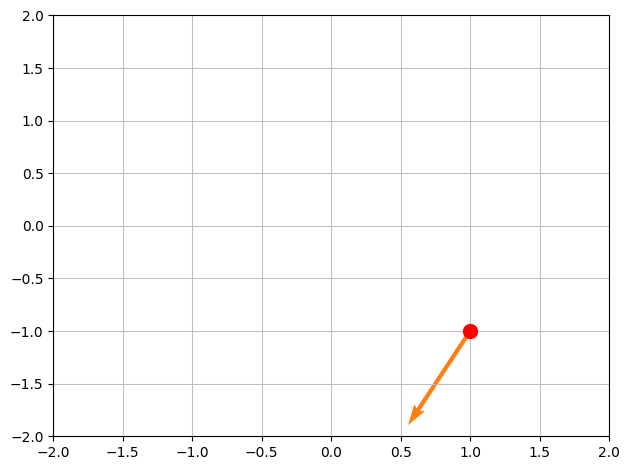

In [10]:
p1 = dtuplot.scatter(x0, rendering_kw={"markersize":10,"color":'r'}, xlim=[-2,2],ylim=[-2,2],show=False)
p1.extend(dtuplot.quiver(x0,e,show=False))
p1.show()

Vi får gradienten i punktet $\boldsymbol{x_0}$ ved

In [11]:
Nabla = Matrix([diff(f,x1),diff(f,x2)]).subs({x1:x0[0],x2:x0[1]})
Nabla

⎡-1⎤
⎢  ⎥
⎣1 ⎦

Hvorefter den retningsafledte, $\nabla_{\boldsymbol{e}} f(\boldsymbol{x_0}) = \braket{\boldsymbol{e},\nabla f(\boldsymbol{x_0})}$ findes ved

In [12]:
a = e.dot(Nabla)
a

## Hesse-matricen

Når vi skal bruge et begreb om multivariate (= "af flere varaible") **skalære** funktioners krumning (relevant senere for ekstremaanalyse og taylorudvilking), skal vi have gang i anden ordens partielle afledte. Informationen om disse anden ordens afledte samles i hessematricen beskrevet i definition 3.5.1.

Den kan konstrueres manuelt i SymPy fra en given funktion med dens tilhørende anden ordens partielt afledte.

In [13]:
f = 1-x1**2/2-x2**3/2*x3 + x1*x3
f

In [14]:
fx1x1 = f.diff(x1,2)
fx1x2 = f.diff(x1,x2)
fx1x3 = f.diff(x1,x3)
fx2x2 = f.diff(x2,2)
fx2x3 = f.diff(x2,x3)
fx3x3 = f.diff(x3,2)

H1 = Matrix([
    [fx1x1, fx1x2, fx1x3],
    [fx1x2, fx2x2, fx2x3],
    [fx1x3, fx2x3, fx3x3]
])

H1

⎡-1     0         1   ⎤
⎢                     ⎥
⎢                   2 ⎥
⎢              -3⋅x₂  ⎥
⎢0   -3⋅x₂⋅x₃  ───────⎥
⎢                 2   ⎥
⎢                     ⎥
⎢         2           ⎥
⎢    -3⋅x₂            ⎥
⎢1   ───────      0   ⎥
⎣       2             ⎦

Eller selvfølgelig med $\verb|dtumathtools|$ indbyggede værktøj

In [15]:
H2 = dtutools.hessian(f)
H2

⎡-1     0         1   ⎤
⎢                     ⎥
⎢                   2 ⎥
⎢              -3⋅x₂  ⎥
⎢0   -3⋅x₂⋅x₃  ───────⎥
⎢                 2   ⎥
⎢                     ⎥
⎢         2           ⎥
⎢    -3⋅x₂            ⎥
⎢1   ───────      0   ⎥
⎣       2             ⎦

Hvor punkter i begge tilfælde skal indsættes via $\verb|.subs()|$

In [16]:
H1.subs({x1:1,x2:2,x3:3}), H2.subs({x1:1,x2:2,x3:3})

⎛⎡-1   0   1 ⎤  ⎡-1   0   1 ⎤⎞
⎜⎢           ⎥  ⎢           ⎥⎟
⎜⎢0   -18  -6⎥, ⎢0   -18  -6⎥⎟
⎜⎢           ⎥  ⎢           ⎥⎟
⎝⎣1   -6   0 ⎦  ⎣1   -6   0 ⎦⎠

## Jacobi-matricen

Definition 3.8.1 tillader at vi også kan differentiere multivariate **vektorfunktioner** i form af Jacobi-matricen. For at illustrere dette, definerer vi funktionen $\boldsymbol f: \mathbb{R}^4 \to \mathbb{R}^3$:

$$
\boldsymbol f (\boldsymbol x) = \begin{bmatrix} f_1(\boldsymbol x)\\ f_2(\boldsymbol x)\\ f_3(\boldsymbol x) \end{bmatrix} = 
\left[\begin{matrix}x_{1}^{2} + x_{2}^{2} x_{3}^{2} + x_{4}^{2} - 1\\x_{1} + \frac{x_{2}^{2}}{2} - x_{3} x_{4}\\x_{1} x_{3} + x_{2} x_{4}\end{matrix}\right]
$$

In [17]:
x1,x2,x3,x4 = symbols('x1:5', real = True)

f = Matrix([
    x1**2 + x2**2 * x3**2 + x4**2 - 1,
    x1 + x2**2/2 - x3 * x4,
    x1 * x3 + x2 * x4
])

f

⎡  2     2   2     2    ⎤
⎢x₁  + x₂ ⋅x₃  + x₄  - 1⎥
⎢                       ⎥
⎢          2            ⎥
⎢        x₂             ⎥
⎢   x₁ + ─── - x₃⋅x₄    ⎥
⎢         2             ⎥
⎢                       ⎥
⎣     x₁⋅x₃ + x₂⋅x₄     ⎦

Bemærk at $f_1, f_2, f_3$ er differentiable for alle $\boldsymbol x \in \mathbb{R}^4$, og vi kan derfor bestemme Jacobi-matricen på formen
$$
\boldsymbol J_f = \begin{bmatrix} \nabla f_1^T \\ \nabla f_2^T \\ \nabla f_3^T \end{bmatrix}
$$

Dette kan gøres manuelt:

In [18]:
J_f = Matrix.vstack(dtutools.gradient(f[0]).T, dtutools.gradient(f[1]).T, dtutools.gradient(f[2]).T)
J_f

⎡             2      2         ⎤
⎢2⋅x₁  2⋅x₂⋅x₃   2⋅x₂ ⋅x₃  2⋅x₄⎥
⎢                              ⎥
⎢ 1       x₂       -x₄     -x₃ ⎥
⎢                              ⎥
⎣ x₃      x₄        x₁      x₂ ⎦

Det kan også gøres således med Sympy's `jacobian`:

In [19]:
J = f.jacobian([x1,x2,x3,x4])
J

⎡             2      2         ⎤
⎢2⋅x₁  2⋅x₂⋅x₃   2⋅x₂ ⋅x₃  2⋅x₄⎥
⎢                              ⎥
⎢ 1       x₂       -x₄     -x₃ ⎥
⎢                              ⎥
⎣ x₃      x₄        x₁      x₂ ⎦

## Parameterkurve i (x,y)-planen og dens tangenter

Vi betragter spiralen, givet ved parameterfremstillingen,

In [20]:
u, t = symbols('u t', real=True)
r = Matrix([u*cos(u), u*sin(u)])
r

⎡u⋅cos(u)⎤
⎢        ⎥
⎣u⋅sin(u)⎦

Tangentvektoren i et vilkårligt punkt fåes nu til

In [21]:
rd = diff(r,u)
rd

⎡-u⋅sin(u) + cos(u)⎤
⎢                  ⎥
⎣u⋅cos(u) + sin(u) ⎦

Vi finder nu en parameterfremstilling for tangenten til spiralen i røringspunktet $((0,-\frac{3\pi}{2}))$, svarende til parameterværdien $u_0=\frac{3\pi}{2}$, som ses ved,

In [22]:
u0 = 3*pi/2
rdu0 = rd.subs(u,u0)
ru0 = r.subs(u,u0)
ru0

⎡  0  ⎤
⎢     ⎥
⎢-3⋅π ⎥
⎢─────⎥
⎣  2  ⎦

Parameterfremstillingen for tangenten i $u_0$ findes ved

In [23]:
T = ru0 + t*rdu0
T

⎡ 3⋅π⋅t  ⎤
⎢ ─────  ⎥
⎢   2    ⎥
⎢        ⎥
⎢     3⋅π⎥
⎢-t - ───⎥
⎣      2 ⎦

Det hele kan nu visualiseres ved

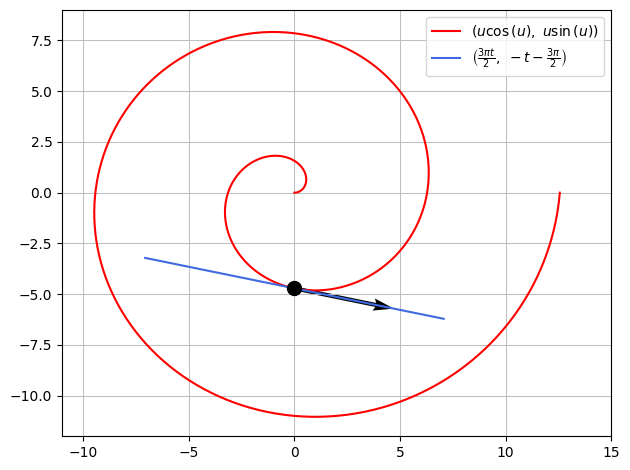

In [24]:
p = dtuplot.plot_parametric(r[0], r[1],(u,0,4*pi),rendering_kw={"color":"red"},use_cm=False,show=False)
p.extend(dtuplot.plot_parametric(T[0],T[1],(t,-1.5,1.5),rendering_kw={"color":"royalblue"},use_cm=False,show=False))
p.extend(dtuplot.scatter(ru0,rendering_kw={"markersize":10,"color":'black'}, show=False))
p.extend(dtuplot.quiver(ru0,rdu0,rendering_kw={"color":"black"},show=False))
p.xlim = [-11,15]
p.ylim = [-12,9]

p.show()